### Reading and Understanding the Dataset

In [197]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [198]:
#load dataset
df_main = pd.read_csv(r"C:\Users\shubh\Downloads\car data.csv")

In [199]:
#Displaying some rows 
df_main.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [200]:
#finding sha[e of data
df_main.shape

(301, 9)

In [201]:
#checking for null values
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [202]:
#numerical stats
df_main.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [203]:
#missing values
df_main.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Data Preprocessing

In [204]:
#creating new columns (age) and adding age by subtracting year column from 2020
df_main['Age'] = 2024 - df_main['Year']

#Dropping year column
df_main.drop('Year',axis=1,inplace = True)

In [205]:
#Renaming columns
df_main.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [206]:
#Checking columns name
df_main.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

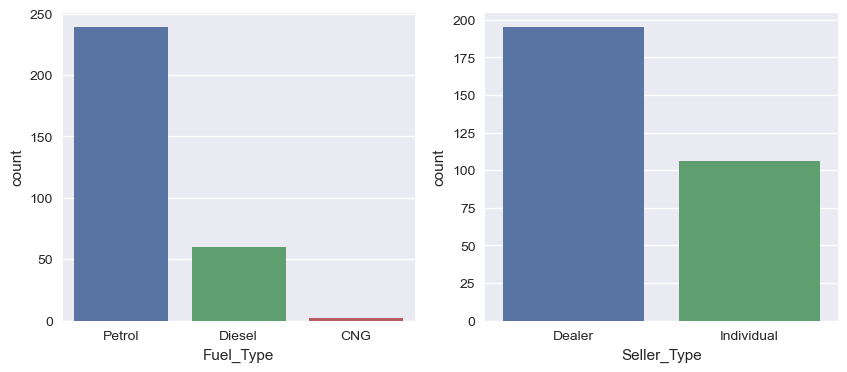

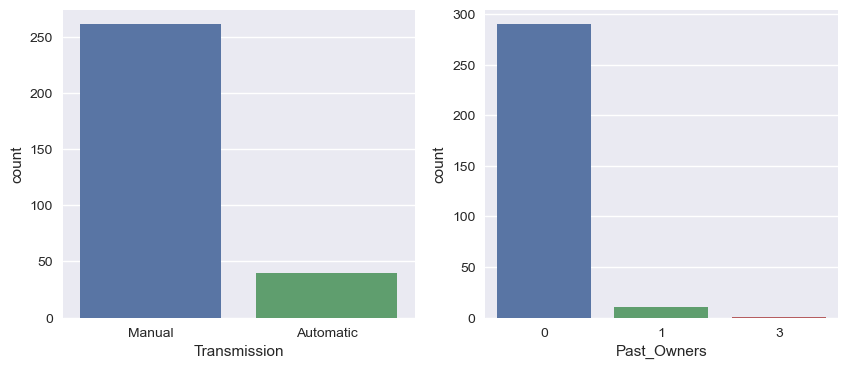

In [207]:
#Plotting count plot to check counts of every clasess for every feature

cat_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    plt.show()

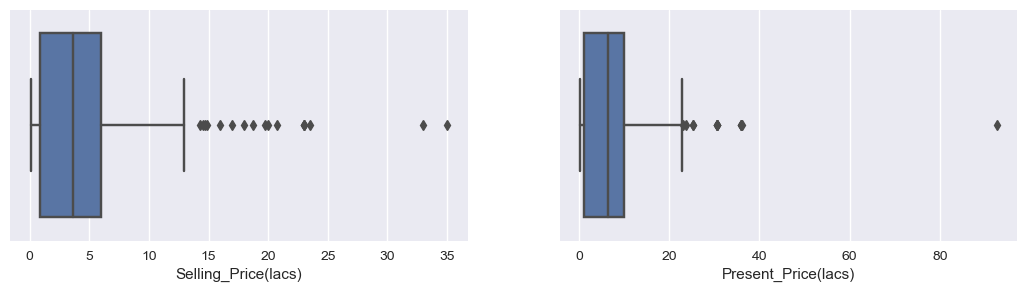

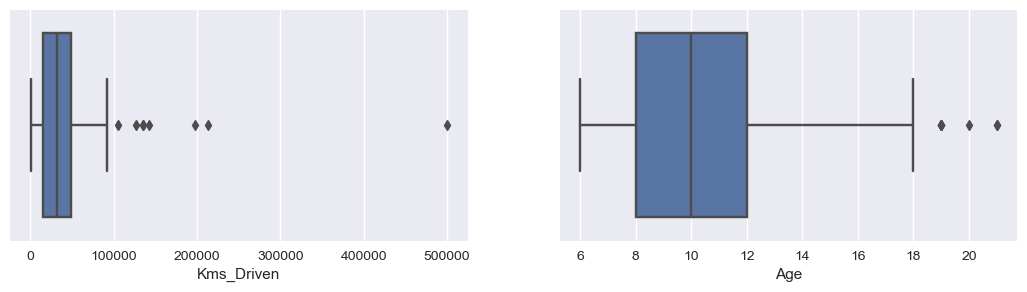

In [208]:
# Plotting Box-plot for numerical features

num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']

i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    plt.show()

In [209]:
# checking values above 99th percentile

df_main[df_main['Present_Price(lacs)'] > df_main['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


In [210]:
# checking values above 99th percentile

df_main[df_main['Selling_Price(lacs)'] > df_main['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,9
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


In [211]:
# checking values above 99th percentile

df_main[df_main['Kms_Driven'] > df_main['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,19
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,14
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,16


In [212]:
# checking values above 99th percentile

df_main[df_main['Age'] > df_main['Age'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
37,800,0.35,2.28,127000,Petrol,Individual,Manual,0,21
39,sx4,2.25,7.98,62000,Petrol,Dealer,Manual,0,21
77,corolla,1.50,12.35,135154,Petrol,Dealer,Automatic,0,20


In [213]:
# adding numerical data

df_num = df_main.select_dtypes(include = ['float64', 'int64'])

#### Bivariate/Multi-Variate Analysis

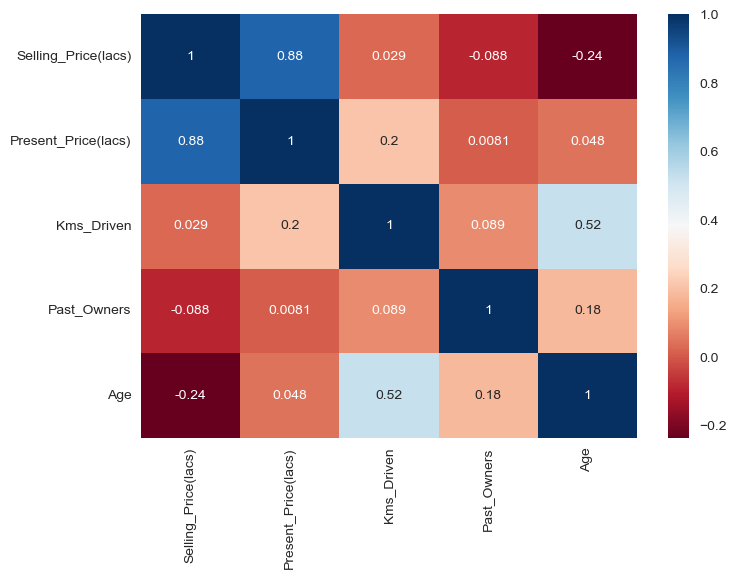

In [214]:
#Plotting Heatmap between all numerical feature

sns.heatmap(df_num.corr(), annot=True, cmap="RdBu")
plt.show()

In [215]:
#Finding correlation between selling_price with all other columns

df_num.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64

### Data Preparation

#### Creating Dummies for Categorical Features

In [216]:
#Dropping car_name column

df_main.drop(labels='Car_Name',axis= 1, inplace = True)

df_main_2 = df_main.copy()

In [142]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0.0,1.0,0.0,1.0
1,4.75,9.54,43000,0,11,1.0,0.0,0.0,1.0
2,7.25,9.85,6900,0,7,0.0,1.0,0.0,1.0
3,2.85,4.15,5200,0,13,0.0,1.0,0.0,1.0
4,4.60,6.87,42450,0,10,1.0,0.0,0.0,1.0


In [218]:
#Label encoding

df_main = pd.get_dummies(data = df_main,drop_first=True, dtype = float) 

In [219]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0.0,1.0,0.0,1.0
1,4.75,9.54,43000,0,11,1.0,0.0,0.0,1.0
2,7.25,9.85,6900,0,7,0.0,1.0,0.0,1.0
3,2.85,4.15,5200,0,13,0.0,1.0,0.0,1.0
4,4.60,6.87,42450,0,10,1.0,0.0,0.0,1.0


### Train-Test Split

In [220]:
# Separating target variable and its features
X = df_main.drop('Selling_Price(lacs)',axis=1)

y = df_main['Selling_Price(lacs)']

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


### Model Creation/Evaluation

#### Applying regression models
1. Linear Regression 
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression
5. Gradient Boosting regression

In [223]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [224]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean oftrain set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

#### Standard Linear Regression or Ordinary Least Squares

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925]
Train CV mean : 0.84


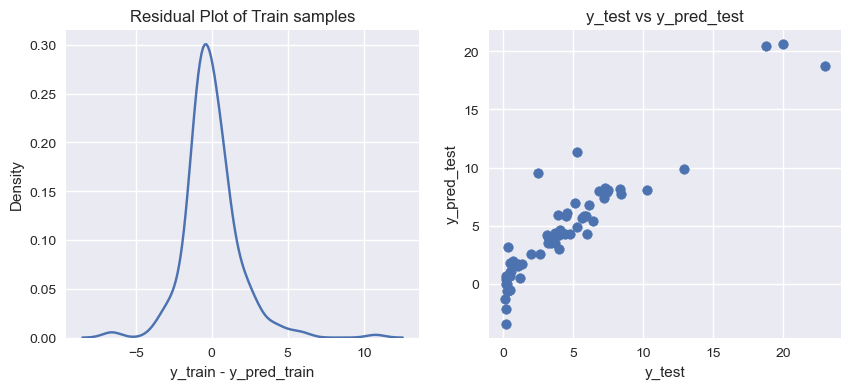

In [157]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr)

#### Ridge

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89874551 0.89917784 0.83132857 0.81902498 0.75750692]
Train CV mean : 0.84


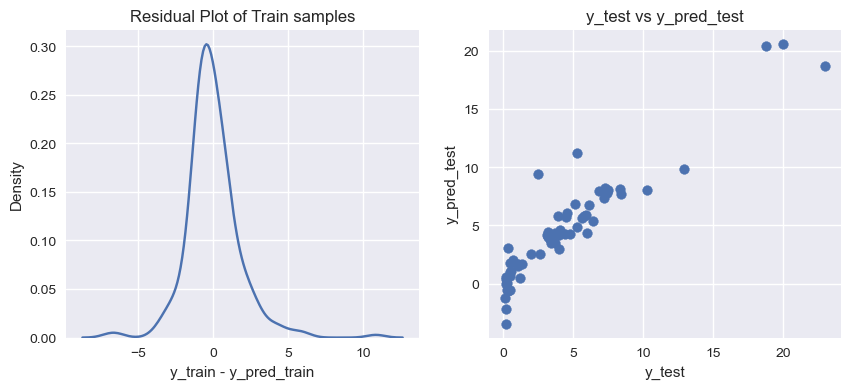

In [158]:
from sklearn.linear_model import Ridge

# Creating Ridge model object
rg = Ridge()

car_pred_model(rg)

#### Lasso

Train R2-score : 0.84
Test R2-score : 0.85
Train CV scores : [0.84071746 0.87433942 0.79489308 0.79546381 0.66739023]
Train CV mean : 0.79


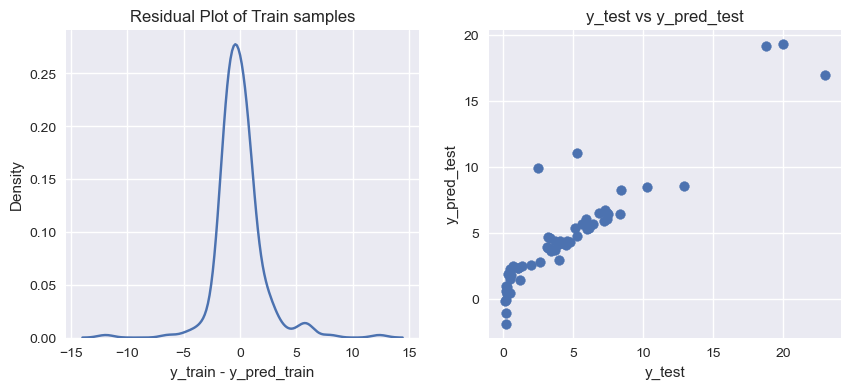

In [159]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()

car_pred_model(ls)

#### Random Forest

In [161]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))

# Maximum number of levels in a tree
max_depth=list(range(4,9,4))

# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))

# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf
             }

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

In [ ]:
car_pred_model(rf_rs)

In [35]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=8,
                      n_estimators=900)


#### Gradient Boosting

In [225]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]

# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))

# Maximum number of levels in a tree
max_depth=list(range(4,9,4))

# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))

# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf
              }

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.94
Train CV scores : [0.91385665 0.92952353 0.89626172 0.92572667 0.74451967]
Train CV mean : 0.88


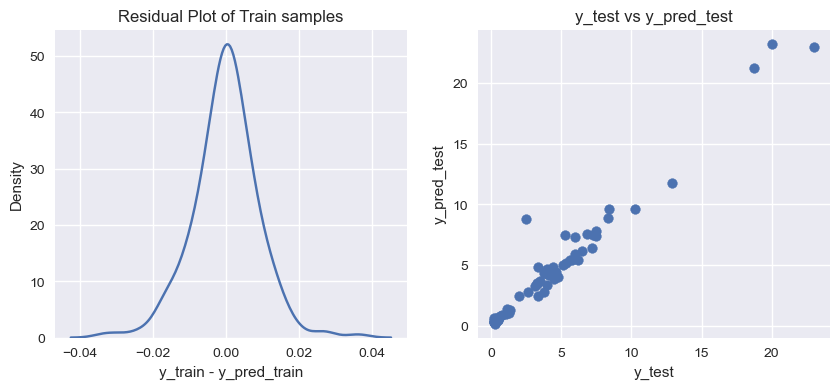

In [226]:
car_pred_model(gb_rs)

In [230]:
print(gb_rs.best_estimator_)

GradientBoostingRegressor(max_depth=4, min_samples_split=8, n_estimators=900)


In [38]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.84
2,Lasso,0.88,0.86,0.84
3,RandomForestRegressor,0.95,0.82,0.87
4,GradientBoostingRegressor,1.00,0.94,0.87


In [243]:
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output = False, drop = 'first'), df_main_2.select_dtypes(include = ['object']).columns)
], remainder = 'passthrough')


pipe_gbr = Pipeline([
    ('ct', ct),
    ('ss', StandardScaler()),
    ('gbr', GradientBoostingRegressor(max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=900))
])

In [244]:
# Separating target variable and its features
X_copy = df_main_2.drop('Selling_Price(lacs)',axis=1)

y_copy = df_main_2['Selling_Price(lacs)']

In [245]:
pipe_gbr.fit(X_copy , y_copy)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('ss', StandardScaler()),
                ('gbr',
                 GradientBoostingRegressor(max_depth=4, min_samples_leaf=7,
                                           min_samples_split=8,
                                           n_estimators=900))])

In [246]:
pickle.dump(pipe_gbr, open('pipe_gbr.pkl', 'wb'))

In [247]:
X_copy

,Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,5.590,27000,Petrol,Dealer,Manual,0,10
1,9.540,43000,Diesel,Dealer,Manual,0,11
2,9.850,6900,Petrol,Dealer,Manual,0,7
3,4.150,5200,Petrol,Dealer,Manual,0,13
4,6.870,42450,Diesel,Dealer,Manual,0,10
5,9.830,2071,Diesel,Dealer,Manual,0,6
6,8.120,18796,Petrol,Dealer,Manual,0,9
7,8.610,33429,Diesel,Dealer,Manual,0,9
8,8.890,20273,Diesel,Dealer,Manual,0,8
9,8.920,42367,Diesel,Dealer,Manual,0,9


In [ ]:
z